
# Project: Investigate TMDb Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This analysis will be analyzing the The Movie Database (TMDb) on movies released from 1960 to 2015. We will be focusing on relationship between movie revenues and the other attributes such as release time, budget, and genres. Note that revenue and budget used in this analysis are in terms of 2010 dollars to account for inflation over time.

In [35]:
# import packages to load and analyze data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure visualizations are plotted within Jupyter notebook
% matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [36]:
#load and read tmdb-movies.csv file
df = pd.read_csv('tmdb-movies.csv')

#print first 5 rows
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


>Initial review of the first 5 rows shows that cast, genres, and production_companies are a concatenation of values separated by '|'.

In [37]:
# list column attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

>The dataset has 10866 rows and 21 columns. There are 9 columns with null entries. To make the analysis easier to read, I will create a new dataframe with attributes that I am interested in investigating the relationships to revenue. 

In [38]:
col = ['genres', 'original_title', 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']
df_new = df[col]
df_new.info() # check to make sure row count is the same and the intereseted columns are there

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 8 columns):
genres            10843 non-null object
original_title    10866 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(3), int64(2), object(3)
memory usage: 679.2+ KB


Of the 9 attributes I'm interested in, 2 attributes need to be clean up.

>**genres**:  There are 23 entries with null that will need to be dropped. Additionally, the concatenated values will need to be parsed and added as individual rows so that there is only one value for 'genres' when I do the analysis on 'genres'.

>**release_date**: This will need to be converted from string to date value

In [39]:
df_new.head()

,genres,original_title,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,Action|Adventure|Science Fiction|Thriller,Jurassic World,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,Action|Adventure|Science Fiction|Thriller,Mad Max: Fury Road,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,Adventure|Science Fiction|Thriller,Insurgent,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,Action|Adventure|Science Fiction|Fantasy,Star Wars: The Force Awakens,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,Action|Crime|Thriller,Furious 7,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [40]:
# descriptive statistic on the dataset
df_new.describe()

,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


>Note that at least 50% of the movies have budget and revenue as $0. These entries will need to be removed when doing analysis on revenue as this seem to be a data gap.

>At least 50% of the movies are released in 2000s and have average rating of at least 6.

In [41]:
#check for any duplicate entries
df_new.duplicated().sum()

1

In [42]:
#the below entry will need to be removed prior to analysis
df_new[df_new.duplicated()]

,genres,original_title,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,Crime|Drama|Action|Thriller|Science Fiction,TEKKEN,3/20/2010,110,5.0,2010,30000000.0,967000.0


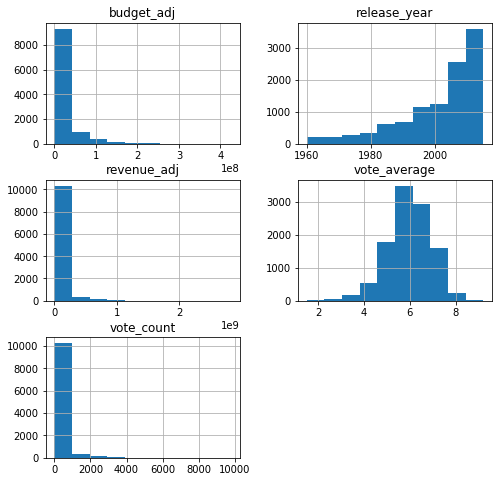

In [43]:
#show distribution of dataset over its differenet attributes
df_new.hist(figsize = (8, 8));

> Data is skewed to the right for budget and revenue where majority of the movie falls under 50 million dollar budget and under 300 million dollar revenue. The average rating has a normal distribution around 6. Graph also show more movies produced in the later years.

### Data Cleaning (Replace this with more specific notes!)

In [44]:
# drop duplicates
df_new = df_new.drop_duplicates()

# check to confirm duplicates are drop and should return 0
df_new.duplicated().sum()

0

In [45]:
# convert release_date from string to datetime
df_new['release_date'] = pd.to_datetime(df_new['release_date'])
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 8 columns):
genres            10842 non-null object
original_title    10865 non-null object
release_date      10865 non-null datetime64[ns]
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 763.9+ KB


In [46]:
#drop rows where genres is null
df_new = df_new.dropna()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 8 columns):
genres            10842 non-null object
original_title    10842 non-null object
release_date      10842 non-null datetime64[ns]
vote_count        10842 non-null int64
vote_average      10842 non-null float64
release_year      10842 non-null int64
budget_adj        10842 non-null float64
revenue_adj       10842 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 762.3+ KB


In [47]:
#create list of columns excluding genres
col_g = list(df_new.columns)
col_g[1:]

['original_title',
 'release_date',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue_adj']

In [48]:
#create a new dataframe where genre column where values separated by '|' will be added as new rows
df_g = df_new.set_index(col_g[1:]).stack().str.split('|', expand=True).stack().unstack(-2).reset_index(-1, drop=True).reset_index()
df_g.head()

,original_title,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres
0,$5 a Day,2008-01-01,12,5.4,2008,0.0,0.000,Drama
1,$5 a Day,2008-01-01,12,5.4,2008,0.0,0.000,Comedy
2,$9.99,2008-09-04,18,6.1,2008,0.0,0.000,Animation
3,$9.99,2008-09-04,18,6.1,2008,0.0,0.000,Drama
4,'71,2014-10-10,274,6.6,2014,0.0,1497553.122,Thriller


In [49]:
df_g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26955 entries, 0 to 26954
Data columns (total 8 columns):
original_title    26955 non-null object
release_date      26955 non-null datetime64[ns]
vote_count        26955 non-null int64
vote_average      26955 non-null float64
release_year      26955 non-null int64
budget_adj        26955 non-null float64
revenue_adj       26955 non-null float64
genres            26955 non-null object
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 1.6+ MB


In [50]:
df_g.describe()

,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,26955.000000,26955.000000,26955.000000,2.695500e+04,2.695500e+04
mean,249.999777,5.956535,2000.698423,2.103946e+07,6.088986e+07
std,638.020401,0.911927,12.764378,3.820031e+07,1.615305e+08
min,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,44.000000,6.000000,2005.000000,1.823126e+02,0.000000e+00
75%,173.000000,6.600000,2011.000000,2.704173e+07,4.376460e+07
max,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [51]:
#check to make sure the row count populated as expected (should be same as def_g)
pd.Series(df_new['genres'].str.cat(sep = '|').split('|')).value_counts(ascending = False).sum()


26955

<a id='eda'></a>
## Exploratory Data Analysis


### 1.	How has movie production trend over years?

In [52]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 8 columns):
genres            10842 non-null object
original_title    10842 non-null object
release_date      10842 non-null datetime64[ns]
vote_count        10842 non-null int64
vote_average      10842 non-null float64
release_year      10842 non-null int64
budget_adj        10842 non-null float64
revenue_adj       10842 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 762.3+ KB


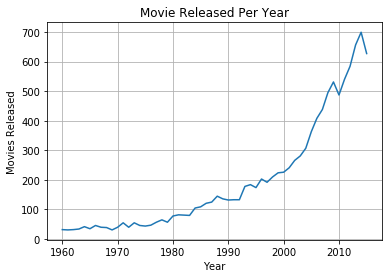

In [53]:
yearly_movie = df_new.release_year.value_counts().sort_index()
plt.plot(yearly_movie);
plt.grid();
plt.ylabel('Movies Released');
plt.xlabel('Year');
plt.title('Movie Released Per Year');

> The number of movies released per year was relatively stable in the 1960s and then doubled every decade until 2010.

### 2. When was the top 20 highest revenue movie produce?

In [54]:
# list the movies with the top 20 highest revenue
top20 = df_new.nlargest(20, 'revenue_adj').sort_values('release_year')

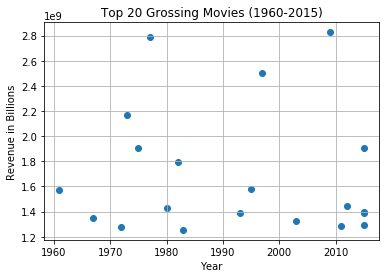

In [55]:
plt.scatter(top20.release_year, top20.revenue_adj);
plt.grid();
plt.ylabel('Revenue in Billions');
plt.xlabel ('Year');
plt.title('Top 20 Grossing Movies (1960-2015)');

> The top 20 grossing movies is distributed from 1960 to 2015 with at least 2 movies released in each decades. The top 3 gross movie produce signficantly higher revenue than the others and were released in the late 2000s (Avatar), late 1970s (Star Wars), and late 1970s (Titanic). Although the 1970s and early 2010s released most number of the highest grossing movies, the 1970s movie revenues spans over a large range while most of the early 2010s movie revenues are under $1.5 Billion.

In [56]:
top20.sort_values('revenue_adj', ascending = False)

,genres,original_title,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,Action|Adventure|Fantasy|Science Fiction,Avatar,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09
1329,Adventure|Action|Science Fiction,Star Wars,1977-03-20,4428,7.9,1977,3.957559e+07,2.789712e+09
5231,Drama|Romance|Thriller,Titanic,1997-11-18,4654,7.3,1997,2.716921e+08,2.506406e+09
10594,Drama|Horror|Thriller,The Exorcist,1973-12-26,1113,7.2,1973,3.928928e+07,2.167325e+09
9806,Horror|Thriller|Adventure,Jaws,1975-06-18,1415,7.3,1975,2.836275e+07,1.907006e+09
3,Action|Adventure|Science Fiction|Fantasy,Star Wars: The Force Awakens,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
8889,Science Fiction|Adventure|Family|Fantasy,E.T. the Extra-Terrestrial,1982-04-03,1830,7.2,1982,2.372625e+07,1.791694e+09
8094,Crime|Drama|Mystery|Thriller|Action,The Net,1995-07-28,201,5.6,1995,3.148127e+07,1.583050e+09
10110,Adventure|Animation|Comedy|Family,One Hundred and One Dalmatians,1961-01-25,913,6.6,1961,2.917944e+07,1.574815e+09
4361,Science Fiction|Action|Adventure,The Avengers,2012-04-25,8903,7.3,2012,2.089437e+08,1.443191e+09


###  3.	Is there a relationship between genre and revenue?

In [57]:
# count how many entries are without any revenue
df_g.query('revenue_adj == 0').shape

(14291, 8)

In [58]:
# remove rows where revenue is 0
df_g = df_g.query('revenue_adj != 0')

# check no revenue of 0
df_g.query('revenue_adj == 0').shape

(0, 8)

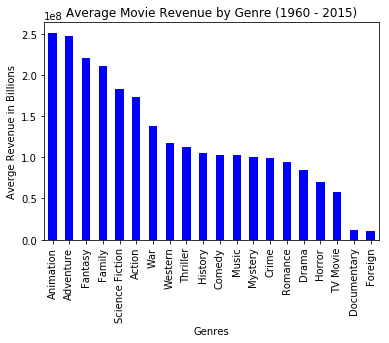

In [59]:
df_g.groupby('genres').mean().revenue_adj.sort_values(ascending = False).plot.bar(color = 'blue');
plt.xlabel('Genres');
plt.ylabel('Averge Revenue in Billions');
plt.title('Average Movie Revenue by Genre (1960 - 2015)');

> The top 4 genres that have the highest average movie revenue (in the order of descending revenue) are animation, adventure, fantasy, and family with revenue above 2 billion dollars. Documentary and Foreign movie generate significantly lower revenue under $250 Million.  

### 4.	Is there a relationship between budget and revenue?

In [60]:
# remove entries with no revenue
df_r = df_new.query('revenue_adj != 0').copy() #make a copy to avoid chained assignment

# check to make sure no entries without revenue
df_r.query('revenue_adj == 0').shape, df_r.shape

((0, 8), (4849, 8))

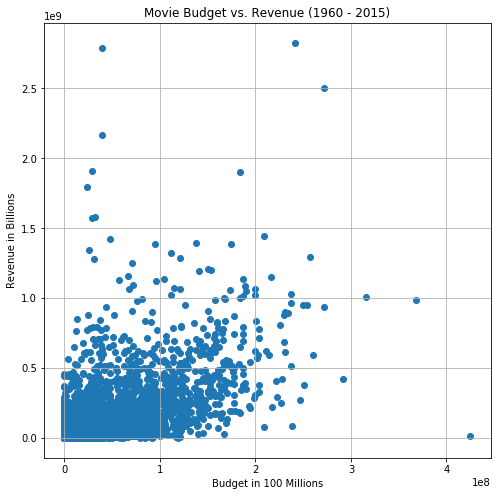

In [61]:
plt.figure(figsize = (8,8));
plt.scatter(df_r.budget_adj, df_r.revenue_adj);
plt.grid();
plt.xlabel('Budget in 100 Millions');
plt.ylabel('Revenue in Billions');
plt.title('Movie Budget vs. Revenue (1960 - 2015)');

> There is a weak positive correlation between budget and revenue.

### 5. Is there a relationship between rating and profit?

In [62]:
#create a new column for profit
df_r['profit'] = df_r.revenue_adj - df_r.budget_adj
df_r.head()

,genres,original_title,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,Action|Adventure|Science Fiction|Thriller,Jurassic World,2015-06-09,5562,6.5,2015,137999939.3,1.392446e+09,1.254446e+09
1,Action|Adventure|Science Fiction|Thriller,Mad Max: Fury Road,2015-05-13,6185,7.1,2015,137999939.3,3.481613e+08,2.101614e+08
2,Adventure|Science Fiction|Thriller,Insurgent,2015-03-18,2480,6.3,2015,101199955.5,2.716190e+08,1.704191e+08
3,Action|Adventure|Science Fiction|Fantasy,Star Wars: The Force Awakens,2015-12-15,5292,7.5,2015,183999919.0,1.902723e+09,1.718723e+09
4,Action|Crime|Thriller,Furious 7,2015-04-01,2947,7.3,2015,174799923.1,1.385749e+09,1.210949e+09


In [63]:
df_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4849 entries, 0 to 10848
Data columns (total 9 columns):
genres            4849 non-null object
original_title    4849 non-null object
release_date      4849 non-null datetime64[ns]
vote_count        4849 non-null int64
vote_average      4849 non-null float64
release_year      4849 non-null int64
budget_adj        4849 non-null float64
revenue_adj       4849 non-null float64
profit            4849 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 378.8+ KB


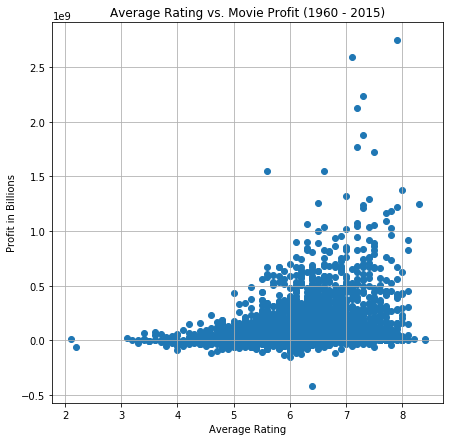

In [64]:
plt.figure(figsize = (7,7));
plt.scatter(df_r.vote_average, df_r.profit);
plt.grid();
plt.xlabel('Average Rating');
plt.ylabel('Profit in Billions');
plt.title('Average Rating vs. Movie Profit (1960 - 2015)');

> There is a slightly stronger positive correlation between average ratings and profit. The higher the rating, the more likely it will be profitable.

### 6.	Are there months of the year that seen significantly higher revenue? What are the top 3 months?

In [65]:
# create a new column for month the movie was released
df_r['release_month'] = df_r['release_date'].dt.month

In [66]:
# confirm the new column is populated as expected
df_r.head()

,genres,original_title,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,release_month
0,Action|Adventure|Science Fiction|Thriller,Jurassic World,2015-06-09,5562,6.5,2015,137999939.3,1.392446e+09,1.254446e+09,6
1,Action|Adventure|Science Fiction|Thriller,Mad Max: Fury Road,2015-05-13,6185,7.1,2015,137999939.3,3.481613e+08,2.101614e+08,5
2,Adventure|Science Fiction|Thriller,Insurgent,2015-03-18,2480,6.3,2015,101199955.5,2.716190e+08,1.704191e+08,3
3,Action|Adventure|Science Fiction|Fantasy,Star Wars: The Force Awakens,2015-12-15,5292,7.5,2015,183999919.0,1.902723e+09,1.718723e+09,12
4,Action|Crime|Thriller,Furious 7,2015-04-01,2947,7.3,2015,174799923.1,1.385749e+09,1.210949e+09,4


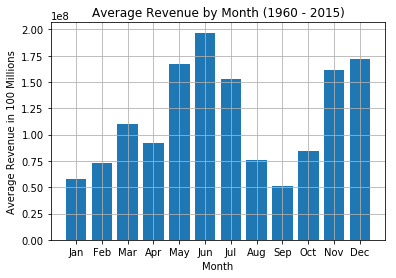

In [67]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov', 'Dec']
avg = df_r.groupby('release_month').revenue_adj.mean()
location = np.arange(len(avg));
plt.bar(location, avg, tick_label = months);
plt.grid();
plt.xlabel('Month');
plt.ylabel('Average Revenue in 100 Millions');
plt.title('Average Revenue by Month (1960 - 2015)');

> There seems to be some relationship on the month the movie was release and the average movie revenue. The top 3 months are June, December and May. The top month's (June) average is almost 4 times as much as the month with the lowest revenue (September).

<a id='conclusions'></a>
## Conclusions

> From 1960 to 2015, the amount of movies released doubled every decade. The top 20 grossing movies are spaced out within this time period. There is a relationship between movie genres and the month the movie is released to its revenue. Genres generating the highest mean revenue are animation, adventure, fantasy, and family. Months that release highest average revenue are June, December, and May. There is some positive correlation between buget and revenue. There is also a positive correlation between profit and average movie rating.

## Submitting your Project 

In [68]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset-Copy1.ipynb'])

0